# Problem Statement
Use relevant machine learning model to predict whether person is diabetic or non diabetic

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
# load the data
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# outcome is target variable
# 1-diabetic
# 0-nondiabetic

# Basic checks

In [4]:
# check no of rows and columns
data.shape

(768, 9)

In [5]:
# print first 5 rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# print last 5 rows
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
# print all the columns
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# check data type of each column
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
# check memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# find unique values in outcome
data.Outcome.unique()

array([1, 0], dtype=int64)

In [11]:
# find count of diabetic and non diabetic
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
# statistical analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [13]:
# Check for missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Exploratory data Analysis

### Univariate
* hist plot is used to check distribution of data
* count plot is used to check whether data is balanced or not

<AxesSubplot:xlabel='Outcome', ylabel='count'>

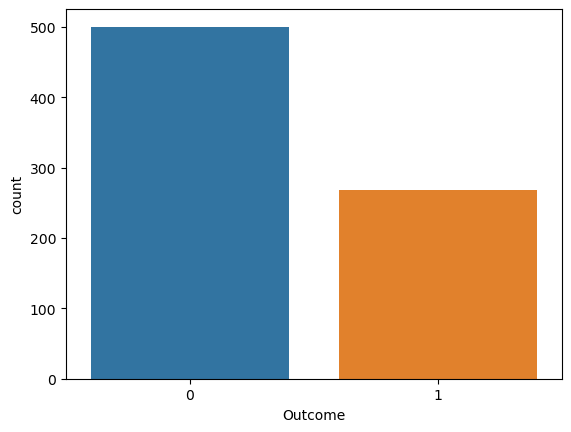

In [14]:
# check whether data is balanced or not
# data balanced: Equal number of records related to diabetic and non diabetic patients
sns.countplot(x=data.Outcome)

In [15]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [16]:
# check for distribution of data

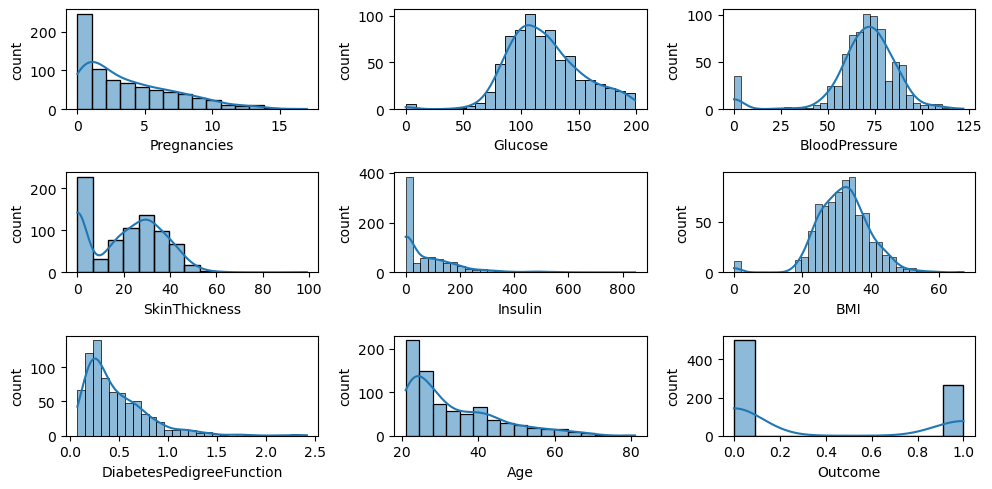

In [17]:
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()

### Bivariate

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

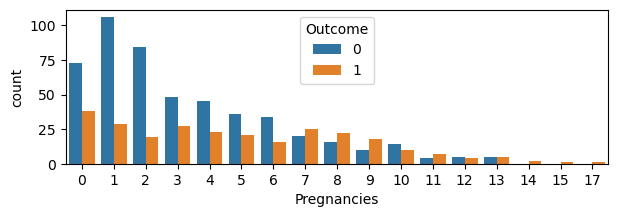

In [18]:
# Analyse how pregnancies will impact diabetes
plt.figure(figsize=(7,2))
sns.countplot(data=data,x='Pregnancies',hue='Outcome')

In [19]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:xlabel='Glucose', ylabel='Count'>

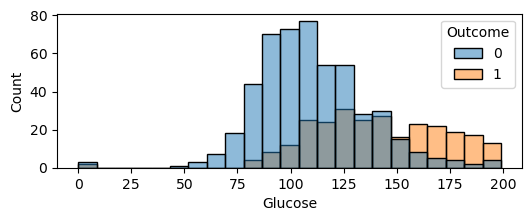

In [20]:
# Analyse relationship between glucose and diabetic
plt.figure(figsize=(6,2))
sns.histplot(data=data,x='Glucose',hue='Outcome')

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

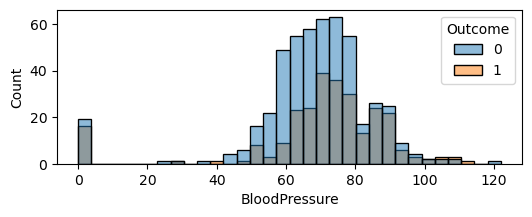

In [21]:
# Analyse relationship between Bloodpressure and diabetes
plt.figure(figsize=(6,2))
sns.histplot(data=data,x='BloodPressure',hue='Outcome')

In [22]:
# Insights
* The chance of being diabetic is less if Bloodpressure is low or normal
* The chance of being diabetic is high if Bloodpressure is very high.

SyntaxError: invalid syntax (1497848142.py, line 2)

In [ ]:
# Analyse relationahip between Insulin and diabetic
plt.figure(figsize=(6,2))
sns.histplot(data=data,x='Insulin',hue='Outcome')

In [ ]:
# The chance of being diabetic is less if Insulin level is less.
# The chance of being diabetic is high if insulin level is high.

In [ ]:
# Analyse Age with diabetic
plt.figure(figsize=(6,2))
sns.histplot(data=data,x='Age',hue='Outcome')

In [ ]:
plt.figure(figsize=(6,2))
sns.histplot(data=data,x='BMI',hue='Outcome')

In [ ]:
# Analyse Glucose with Bloodpressure
plt.figure(figsize=(6,3))
sns.scatterplot(data=data,x='Glucose',y='BloodPressure',hue='Outcome')

In [ ]:
# Analyse Insulin and Bloodpressure
plt.figure(figsize=(6,2))
sns.scatterplot(data=data,x='Insulin',y='BloodPressure',hue='Outcome')

### Multivariate

In [ ]:
sns.pairplot(data,hue='Outcome')

# Data Preprocessing

In [ ]:
# check for missing values and handle them
data.isnull().sum()

In [ ]:
# Numerical: mean(when data is normal)or median(when data is not normal/skewed)
# categorical: mode

In [ ]:
# Check for duplicates
data.duplicated().sum()

In [ ]:
data['Glucose'].replace(0,data['Glucose'].median(),inplace=True)

In [ ]:
data['BloodPressure'].replace(0,data['BloodPressure'].median(),inplace=True)

In [23]:
data['Insulin'].replace(0,data['Insulin'].median(),inplace=True)

In [24]:
data['BMI'].replace(0,data['BMI'].median(),inplace=True)

In [25]:
data['SkinThickness'].replace(0,data['SkinThickness'].median(),inplace=True)

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# check for outliers

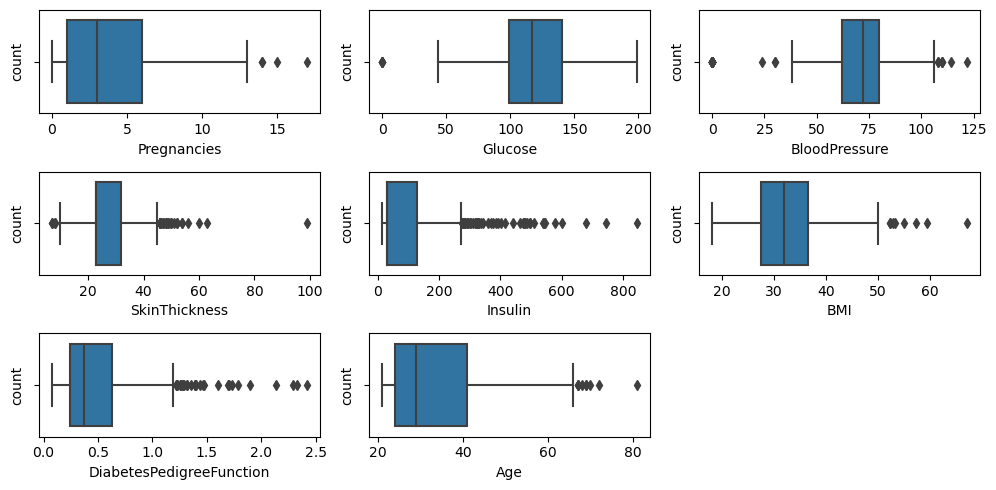

In [27]:
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in data.drop('Outcome',axis=1):
    if plotnumber<9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()

###  Scaling data [ Normalization or standardization]

In [28]:
# Min max scaler
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
df=['Pregnancies','Outcome']
data1=scaling.fit_transform(data.drop(df,axis=1))


In [29]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [30]:
data2=pd.DataFrame(data1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
data2

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.743719,0.590164,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.427136,0.540984,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.919598,0.524590,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.447236,0.540984,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.688442,0.327869,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.507538,0.622951,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.613065,0.573770,0.217391,0.019832,0.380368,0.111870,0.100000
765,0.608040,0.590164,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.633166,0.491803,0.173913,0.019832,0.243354,0.115713,0.433333


In [31]:
df1=data[['Pregnancies','Outcome']]

In [32]:
new_data=pd.concat([data2,df1],axis=1)
new_data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.743719,0.590164,0.304348,0.019832,0.314928,0.234415,0.483333,6,1
1,0.427136,0.540984,0.239130,0.019832,0.171779,0.116567,0.166667,1,0
2,0.919598,0.524590,0.173913,0.019832,0.104294,0.253629,0.183333,8,1
3,0.447236,0.540984,0.173913,0.096154,0.202454,0.038002,0.000000,1,0
4,0.688442,0.327869,0.304348,0.185096,0.509202,0.943638,0.200000,0,1
...,...,...,...,...,...,...,...,...,...
763,0.507538,0.622951,0.445652,0.199519,0.300613,0.039710,0.700000,10,0
764,0.613065,0.573770,0.217391,0.019832,0.380368,0.111870,0.100000,2,0
765,0.608040,0.590164,0.173913,0.117788,0.163599,0.071307,0.150000,5,0
766,0.633166,0.491803,0.173913,0.019832,0.243354,0.115713,0.433333,1,1


In [33]:
# Skipping converting categorical data into numerical

# Feature Engineering

In [34]:
# check for multicollinearity
new_data.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
Glucose,1.000000,0.152590,0.158027,0.355252,0.218806,0.137337,0.263514,0.129459,0.466581
BloodPressure,0.152590,1.000000,0.168421,0.085221,0.184220,0.041265,0.239528,0.141282,0.065068
SkinThickness,0.158027,0.168421,1.000000,0.238188,0.546951,0.142977,0.054514,0.032568,0.189065
Insulin,0.355252,0.085221,0.238188,1.000000,0.189022,0.178029,-0.015413,-0.055697,0.148457
BMI,0.218806,0.184220,0.546951,0.189022,1.000000,0.153506,0.025744,0.021546,0.312249
DiabetesPedigreeFunction,0.137337,0.041265,0.142977,0.178029,0.153506,1.000000,0.033561,-0.033523,0.173844
Age,0.263514,0.239528,0.054514,-0.015413,0.025744,0.033561,1.000000,0.544341,0.238356
Pregnancies,0.129459,0.141282,0.032568,-0.055697,0.021546,-0.033523,0.544341,1.000000,0.221898
Outcome,0.466581,0.065068,0.189065,0.148457,0.312249,0.173844,0.238356,0.221898,1.000000


<AxesSubplot:>

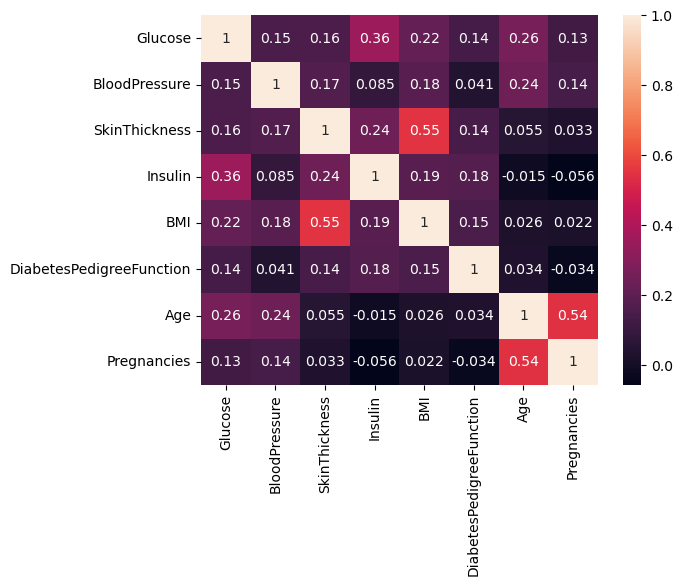

In [35]:
sns.heatmap(new_data.drop('Outcome',axis=1).corr(),annot=True)

# Model Building

In [36]:
# split data into x and y
x=new_data.drop('Outcome',axis=1)
y=new_data[['Outcome']]

In [37]:
# Split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

In [38]:
x_train.shape

(537, 8)

In [39]:
x_test.shape

(231, 8)

In [40]:
data.shape

(768, 9)

# Apply Logistic regression

In [41]:
# import Logistic regression model
from sklearn.linear_model import LogisticRegression
# initialize the model
model=LogisticRegression()
# train model with x_train,y_train
model.fit(x_train,y_train)

LogisticRegression()

In [42]:
# make predictions using x_test
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [43]:
df=y_test.copy()

In [44]:
df['y_pred']=y_pred

In [45]:
df

,Outcome,y_pred
158,0,0
251,0,0
631,0,0
757,1,0
689,1,1
...,...,...
225,0,0
387,1,0
120,1,1
7,0,1


# Evaluate the mode

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [47]:
confusion_matrix(y_test,y_pred)

array([[138,  17],
       [ 43,  33]], dtype=int64)

In [48]:
accuracy_score(y_test,y_pred)

0.7402597402597403

In [49]:
precision_score(y_test,y_pred)

0.66

In [50]:
recall_score(y_test,y_pred)

0.4342105263157895

In [51]:
f1_score(y_test,y_pred)

0.5238095238095238

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       155
           1       0.66      0.43      0.52        76

    accuracy                           0.74       231
   macro avg       0.71      0.66      0.67       231
weighted avg       0.73      0.74      0.72       231



In [53]:
# ROC-AUC Method
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.6622665534804754
